In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## e) Simular AR1

In [3]:
unif = np.random.default_rng().uniform
normal = np.random.default_rng().normal

In [18]:
def AR1(x, phi, s2, steps = 1):
    _ = [x]
    for i in range(steps):
        _.append(phi * _[-1] + normal(0,s2))
    return _

In [19]:
mu = 0
s2 = 1
phi = 0.5
x_0 = normal(mu, s2)

In [28]:
array = AR1(x_0, phi, s2, 10000)

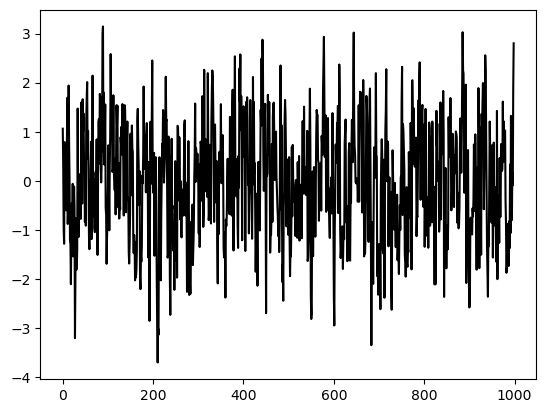

In [37]:
plt.plot(array[-1000:-1], color='k', linestyle='-')
plt.show()

In [30]:
limit_dist = []
for i in range(10000):
    x_0 = normal(mu, s2)
    array = AR1(x_0, phi, s2, 10000)
    limit_dist.append(array[-1])

In [49]:
np.mean(limit_dist),np.var(limit_dist)

(0.005319582626417637, 1.3350881504139325)

In [45]:
_x = np.linspace(-4,4, 1000)
_y = stats.norm.pdf(_x)

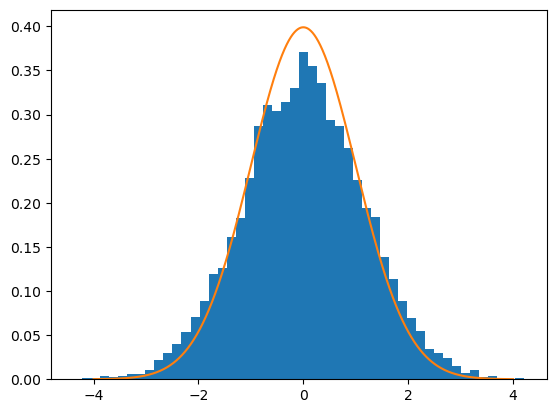

In [46]:
plt.hist(limit_dist, bins=50,density=True)
plt.plot(_x,_y)
plt.show()

## Pregunta 2


In [107]:
def ADN_step(x, P):
    p = P.T[x-1]
    u = unif(0,1)
    for i in range(P.shape[0]):
        if u <= sum(p[0:i+1]):
            break
    return i+1
def ADN(x_0, P, n):
    _ = [x_0]
    for i in range(n):
        _.append(ADN_step(_[-1], P))
    return _

In [108]:
x_0 = 1


P = np.array([
    [.15, .35, .35, .1],
    [.166, .334, .334, .166],
    [.1875, .3125, .3125, .1875],
    [.2, .3, .3, .2]
])

n = 100

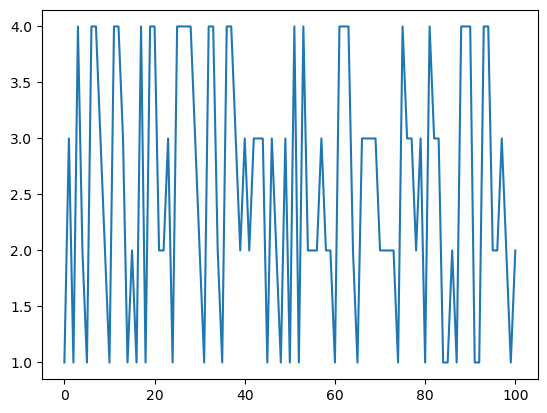

In [109]:
plt.plot(ADN(x_0, P, n))
plt.show()